<a href="https://colab.research.google.com/github/Ezemettler/PI2-DA/blob/main/EDA_PI2DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalamos la libreria yfinance

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [83]:
# importamos librerias

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# ¿Qué es el S&P 500?

El Indice Standard & Poor's 500, más conocido como S&P500 , es un conjunto de las 500 mayores empresas que cotizan en las bolsas de Estados Unidos ponderadas según su capitalización bursátil.

In [54]:
# Traemos el listado de empresas del S&P500 
# el [0] trae la primer tabla que aparece en la web de wikipedia

empresas = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
empresas

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Symbol ticker

El símbolo ticker o clave de pizarra es un código que hace referencia a las acciones de una compañía cotizada en un mercado de valores. 

Este código es único para las acciones de cada empresa, por lo que no habrá dos acciones de empresas diferentes con el mismo ticker.

In [55]:
# Pasamos los valores de la columna symbol a una lista
# Symbol es la abreviatura del n

lista_symbol = list(set(empresas.Symbol))
lista_symbol[0:5]     # Mostramos los primeros 5 valores de la lista

['LDOS', 'PRU', 'IT', 'NUE', 'IQV']

In [70]:
# Vamos a traer por cada symbol, las cotizaciones desde el 2000-01-01 al 2022-12-31

data_list = list()          # Creamos una lista donde vamos a guardar los datos descargados
for ticker in lista_symbol:
  data = yf.download(ticker, start='2000-01-01', end='2022-12-31')  # Descarga de datos de cada ticker en el período
  data['Symbol'] = ticker   # Creamos columna y agregamos el symbol de la compania
  data_list.append(data)    # Agregamos la data generada del ticker al final de la lista

df = pd.concat(data_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [71]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2006-10-17,44.617283,44.641975,43.604939,44.370369,23.208605,1741338.0,LDOS
2006-10-18,45.037037,45.037037,43.432098,43.629631,22.821154,1484487.0,LDOS
2006-10-19,43.629631,43.925926,42.493828,42.641975,22.304533,1481774.0,LDOS
2006-10-20,42.962963,44.197533,42.592594,44.074074,23.053623,1440342.0,LDOS
2006-10-23,44.691357,44.691357,43.580246,43.925926,22.976131,1152306.0,LDOS


In [72]:
# Mostramos info relevante del dataframe generado.
# Cant de columnas y registros, tipos de datos por cada columna, espacio en memoria del dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2587986 entries, 2006-10-17 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Adj Close  float64
 5   Volume     float64
 6   Symbol     object 
dtypes: float64(6), object(1)
memory usage: 158.0+ MB


In [73]:
# Verificamos valores faltantes en las columnas

df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

## Precios historicos

Vamos a graficar los valores de cierre totales de todas las companias, para tener una visión general de los mercados

In [74]:
# Agregamos una columna para la fecha

df['Date'] = df.index
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
Date,,,,,,,,
2006-10-17,44.617283,44.641975,43.604939,44.370369,23.208605,1741338.0,LDOS,2006-10-17
2006-10-18,45.037037,45.037037,43.432098,43.629631,22.821154,1484487.0,LDOS,2006-10-18
2006-10-19,43.629631,43.925926,42.493828,42.641975,22.304533,1481774.0,LDOS,2006-10-19
2006-10-20,42.962963,44.197533,42.592594,44.074074,23.053623,1440342.0,LDOS,2006-10-20
2006-10-23,44.691357,44.691357,43.580246,43.925926,22.976131,1152306.0,LDOS,2006-10-23


In [75]:
# Reseteamos los indices

df.reset_index(drop = True, inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
0,44.617283,44.641975,43.604939,44.370369,23.208605,1741338.0,LDOS,2006-10-17
1,45.037037,45.037037,43.432098,43.629631,22.821154,1484487.0,LDOS,2006-10-18
2,43.629631,43.925926,42.493828,42.641975,22.304533,1481774.0,LDOS,2006-10-19
3,42.962963,44.197533,42.592594,44.074074,23.053623,1440342.0,LDOS,2006-10-20
4,44.691357,44.691357,43.580246,43.925926,22.976131,1152306.0,LDOS,2006-10-23
...,...,...,...,...,...,...,...,...
2587981,302.570007,303.000000,288.269989,293.950012,293.950012,2338800.0,ENPH,2022-12-23
2587982,292.420013,293.029999,273.769989,274.540009,274.540009,3282600.0,ENPH,2022-12-27
2587983,272.160004,273.089996,262.519989,267.380005,267.380005,2891900.0,ENPH,2022-12-28
2587984,271.920013,274.440002,264.140015,265.489990,265.489990,3300700.0,ENPH,2022-12-29


In [76]:
# Vamos a generar una columna con el año.mes para luego graficar

df['Year'] = df['Date'].dt.year
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year
0,44.617283,44.641975,43.604939,44.370369,23.208605,1741338.0,LDOS,2006-10-17,2006
1,45.037037,45.037037,43.432098,43.629631,22.821154,1484487.0,LDOS,2006-10-18,2006
2,43.629631,43.925926,42.493828,42.641975,22.304533,1481774.0,LDOS,2006-10-19,2006
3,42.962963,44.197533,42.592594,44.074074,23.053623,1440342.0,LDOS,2006-10-20,2006
4,44.691357,44.691357,43.580246,43.925926,22.976131,1152306.0,LDOS,2006-10-23,2006


In [90]:
# Armamos un promedio de precios por año 

hist_price = df.groupby(['Year']).mean()
hist_price.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2000,33.499679,34.227973,32.744152,33.491234,21.789713,5.278260e+06
2001,31.631970,32.130436,31.097700,31.631751,20.181897,5.514821e+06
2002,28.936200,29.377756,28.451011,28.920444,18.857156,5.680944e+06
2003,28.677927,28.999709,28.346035,28.696562,19.231013,5.367761e+06
2004,34.919678,35.260026,34.584173,34.934846,23.974445,6.172277e+06


In [91]:
hist_price['Year'] = hist_price.index
hist_price.reset_index(drop = True, inplace = True)
hist_price.head()

,Open,High,Low,Close,Adj Close,Volume,Year
0,33.499679,34.227973,32.744152,33.491234,21.789713,5.278260e+06,2000
1,31.631970,32.130436,31.097700,31.631751,20.181897,5.514821e+06,2001
2,28.936200,29.377756,28.451011,28.920444,18.857156,5.680944e+06,2002
3,28.677927,28.999709,28.346035,28.696562,19.231013,5.367761e+06,2003
4,34.919678,35.260026,34.584173,34.934846,23.974445,6.172277e+06,2004


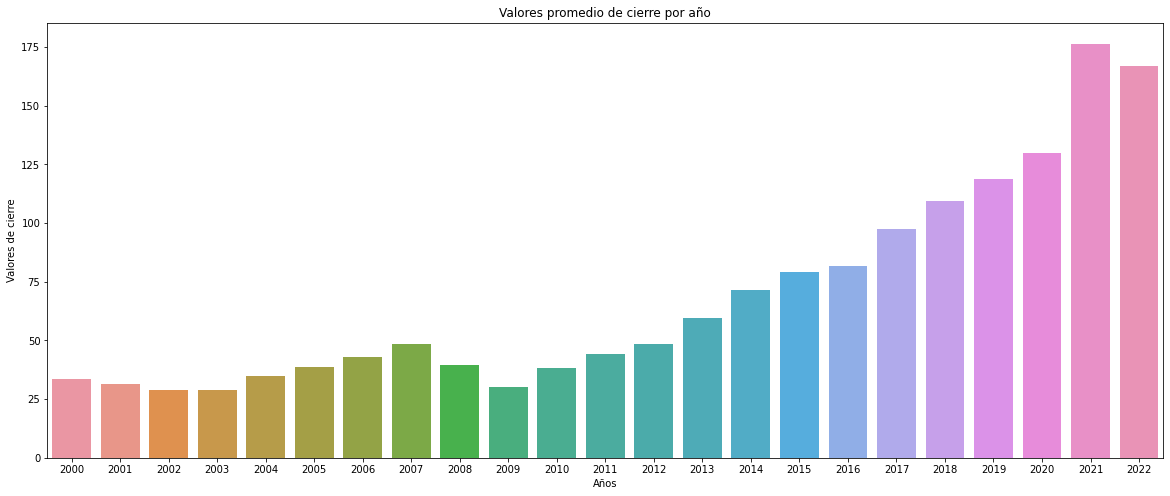

In [115]:
# Graficamos

plt.figure(figsize=(20, 8))       # Tamaño de gráfico
sns.barplot(x='Year', y='Close', data=hist_price) 
plt.title('Valores promedio de cierre por año')
plt.xlabel('Años')
plt.ylabel('Valores de cierre')
plt.show()

In [130]:
# Pico min
min = hist_price['Close'].idxmin()
print("Min:", hist_price['Year'].iloc[min] )


# Pico max 
max = hist_price['Close'].idxmax()
print("Max:", hist_price['Year'].iloc[max] )

Min: 2003
Max: 2021


# Observaciones

## Períodos de baja

Notamos como el min de precio de cierre se da en el año 2003, luego del periodo de crisis llamado 'burbuja de las .com'.

\
También podemos observar en el periodo 2008/2009 vuelve a aparecer un periodo de baja del mercado, debido al colapso de la burbuja inmobiliaria en los Estados Unidos, que provocó aproximadamente en octubre de 2007 la llamada crisis de las hipotecas subprime.

\
## Períodos de alta
En el año 2021 se da el pico máximo de los ultimos años, correspondiente al periodo de recuperación económica post covid.

\
# Presente
En el período presente, por lo que se ve que en 2022 ya hubo una baja con respecto al 2021, en parte debido a la suba de tasas de interés por parte de la reserva federal de los Estados Unidos para intentar frenar la inflación, lo que causa un período de recesión económica. 


## ¿Qué día de la semana es mejor para invertir?

In [22]:
# Creamos una nueva columna fecha, porque no pude obtener el dia de la semana del campo Date

df['Date'] = df.index

In [23]:
# Agregamos una columna para obtener el dia de la semana

df['dayOfWeek'] = df['Date'].dt.day_name()

In [24]:
df

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,dayOfWeek
Date,,,,,,,,,
2006-10-17,44.617283,44.641975,43.604939,44.370369,23.208599,1741338.0,LDOS,2006-10-17,Tuesday
2006-10-18,45.037037,45.037037,43.432098,43.629631,22.821150,1484487.0,LDOS,2006-10-18,Wednesday
2006-10-19,43.629631,43.925926,42.493828,42.641975,22.304541,1481774.0,LDOS,2006-10-19,Thursday
2006-10-20,42.962963,44.197533,42.592594,44.074074,23.053625,1440342.0,LDOS,2006-10-20,Friday
2006-10-23,44.691357,44.691357,43.580246,43.925926,22.976128,1152306.0,LDOS,2006-10-23,Monday
...,...,...,...,...,...,...,...,...,...
2022-12-23,302.570007,303.000000,288.269989,293.950012,293.950012,2338800.0,ENPH,2022-12-23,Friday
2022-12-27,292.420013,293.029999,273.769989,274.540009,274.540009,3282600.0,ENPH,2022-12-27,Tuesday
2022-12-28,272.160004,273.089996,262.519989,267.380005,267.380005,2891900.0,ENPH,2022-12-28,Wednesday


In [26]:
# Reseteamos los indices, para luego poder ordenar por fecha
# Sin esto, salia error

df.reset_index(drop = True, inplace = True)

In [27]:
df_byDate = df.sort_values('Date')
df_byDate

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,dayOfWeek
1876424,22.000000,22.312500,20.250000,20.250000,11.357785,3011300.0,LMT,2000-01-03,Monday
1827330,9.750000,9.750000,9.250000,9.416667,6.139278,767100.0,RSG,2000-01-03,Monday
700621,23.198961,23.806999,22.684469,23.198961,10.036258,2366796.0,WMB,2000-01-03,Monday
491582,11.111111,11.166667,10.722222,10.833333,9.600732,1853325.0,VTRS,2000-01-03,Monday
436928,23.843750,24.500000,23.843750,24.312500,13.171329,5055000.0,CAT,2000-01-03,Monday
...,...,...,...,...,...,...,...,...,...
2308885,138.979996,140.110001,138.279999,140.000000,140.000000,2554500.0,TMUS,2022-12-30,Friday
893464,69.330002,70.330002,68.809998,70.250000,69.952866,2438200.0,MCHP,2022-12-30,Friday
899251,203.559998,205.610001,202.149994,205.440002,205.440002,345800.0,VRSN,2022-12-30,Friday
901748,147.199997,147.789993,144.740005,146.550003,146.206467,1249500.0,ZTS,2022-12-30,Friday
